In [1]:
import cv2

In [2]:
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

In [14]:
options={
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.3, # threshold for confidence factor
    #'gpu' : 1.0
}
tfnet=TFNet(options)

Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.03464245796203613s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [24]:
img=cv2.imread('Dog.jpg',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
running=tfnet.return_predict(img)

In [25]:
result=running
result

[{'label': 'dog',
  'confidence': 0.68388087,
  'topleft': {'x': 304, 'y': 51},
  'bottomright': {'x': 1237, 'y': 719}},
 {'label': 'sofa',
  'confidence': 0.40752006,
  'topleft': {'x': 0, 'y': 0},
  'bottomright': {'x': 1168, 'y': 670}}]

In [26]:
tl=(result[0]['topleft']['x'],result[0]['topleft']['y'])
br=(result[0]['bottomright']['x'],result[0]['bottomright']['y'])
label=result[0]['label']

In [28]:
img=cv2.rectangle(img,tl,br,(0,255,0), 7)  # rectangle(image, topleft, bottomright, color, pixel thickness)

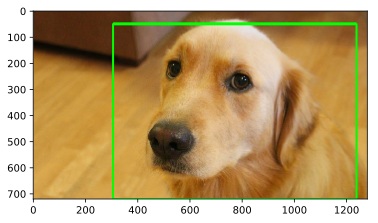

In [33]:
plt.imshow(img)
plt.show()

In [ ]:
img=cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,2,(0,0,0),2)

In [ ]:
plt.imshow(img)
plt.show()